## Serial LETK Filtering


In [ ]:
import Simulator
import Observation
import Statistics
import KalmanFilter
import ETKalmanFilter
import SLETKalmanFilter

Error: Session cannot generate requests

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [ ]:
timestamp = "2021_08_11-14_10_29"

grid, simulator = Simulator.from_file(timestamp)

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [ ]:
obs_timestamp = "2021_08_11-14_10_37"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

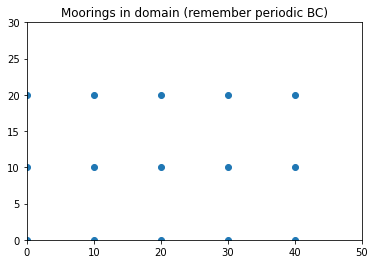

In [ ]:
observation.plot_positions()

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [ ]:
prior_args = Statistics.prior_args_from_file(timestamp)

## Kalman filtering

Updating/conditioning the distributions at every observation time

Please remember to set priors!


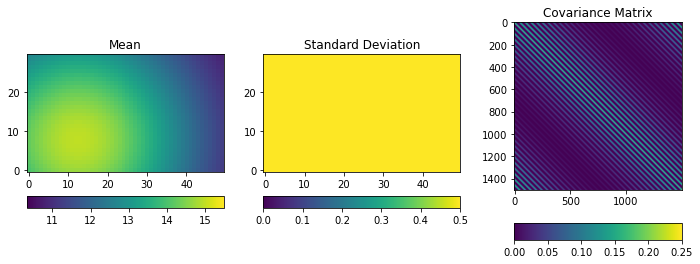

In [ ]:
statistics_kf = Statistics.Statistics(simulator)
statistics_kf.set_prior(prior_args)

statistics_kf.plot()

0


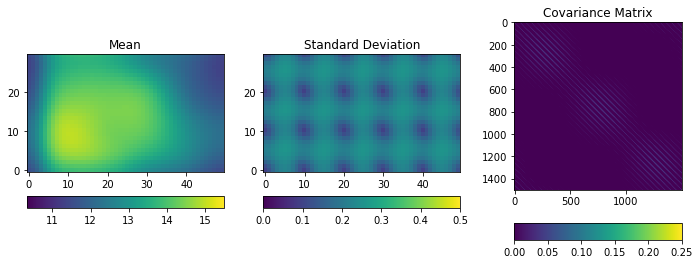

1


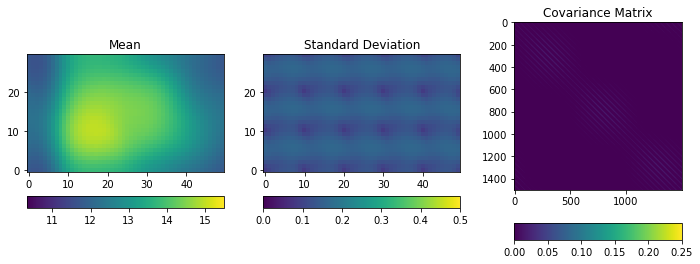

2


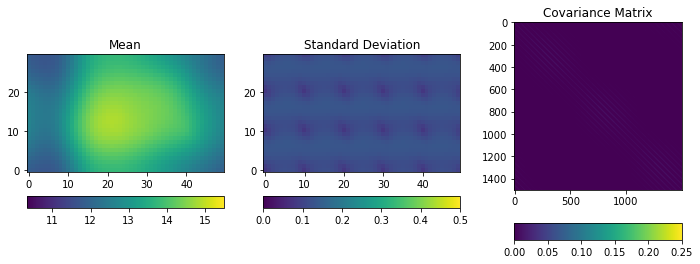

3


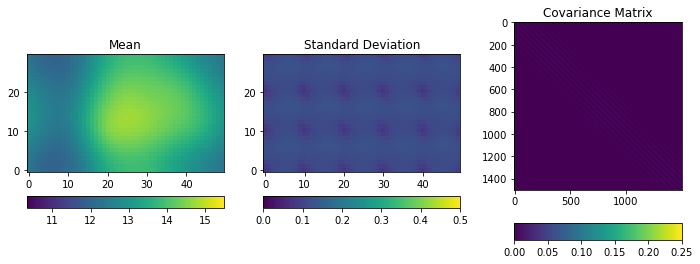

4


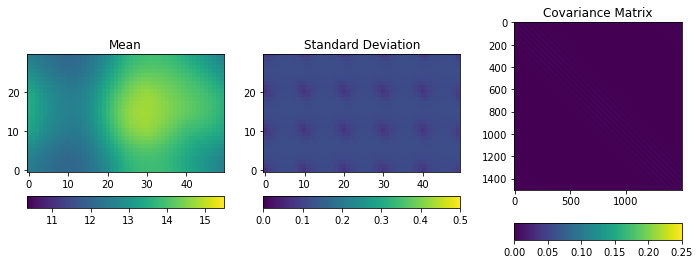

5


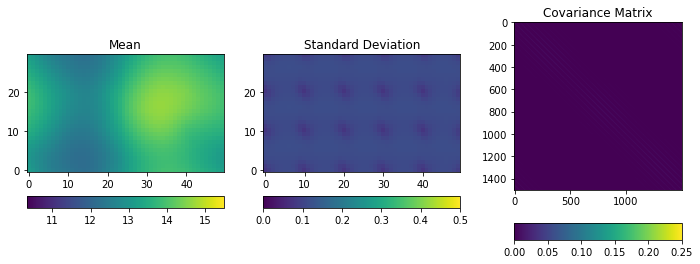

6


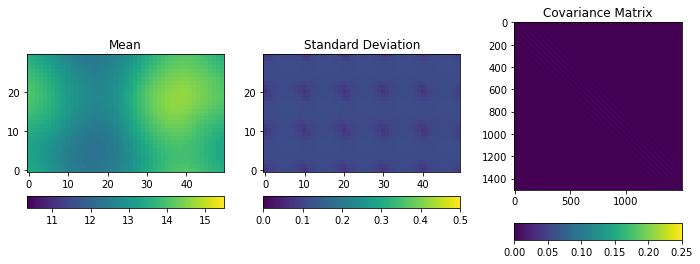

7


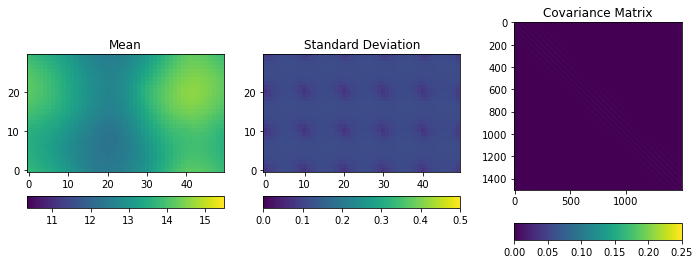

8


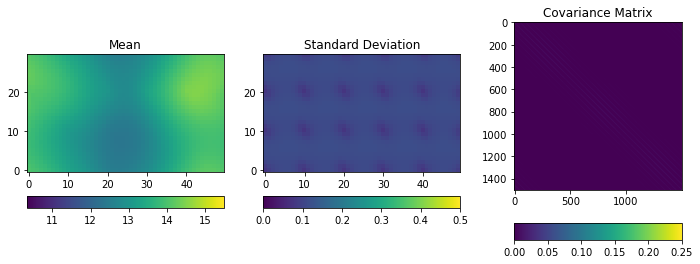

9


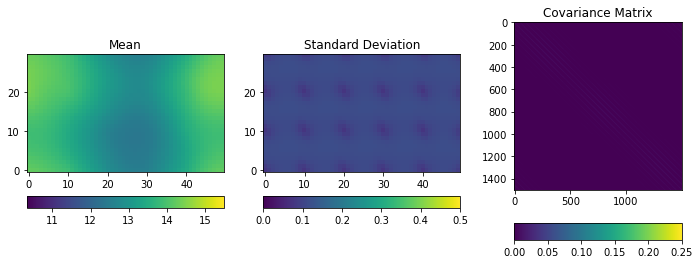

In [ ]:
kalmanFilter = KalmanFilter.Kalman(statistics_kf, observation)

for t in range(observation.N_obs):
    print(t)
    statistics_kf.propagate(25)
    kalmanFilter.filter(statistics_kf.mean, statistics_kf.cov, observation.obses[t])
    statistics_kf.plot()

## ETKF filtering

Updating/conditioning the distributions at every observation time

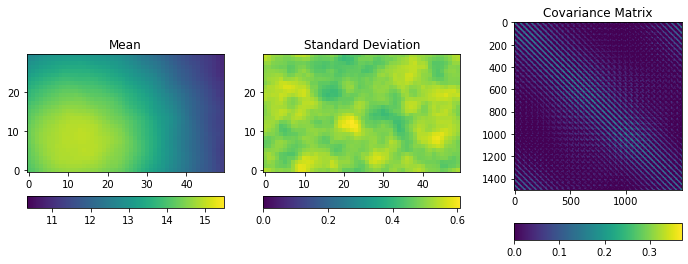

In [ ]:
statistics_etkf = Statistics.Statistics(simulator, 100)
statistics_etkf.set_prior(prior_args)

statistics_etkf.plot()

0


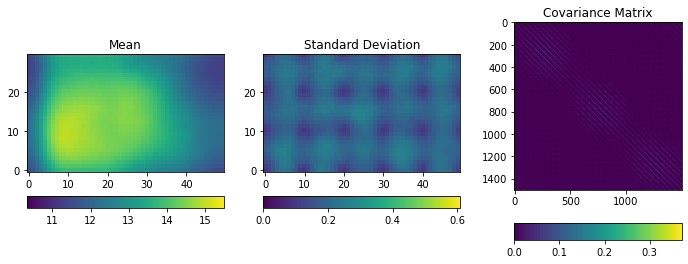

1


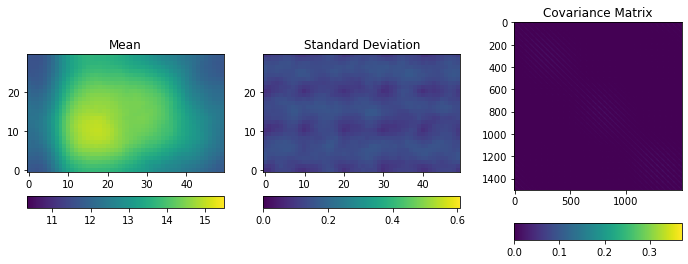

2


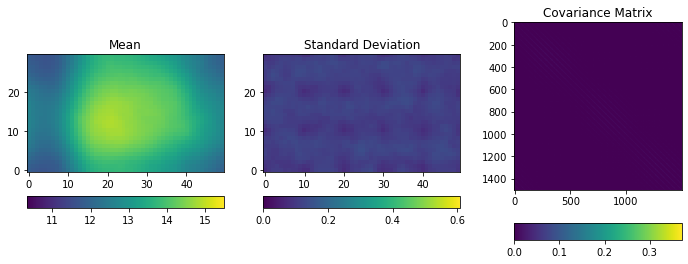

3


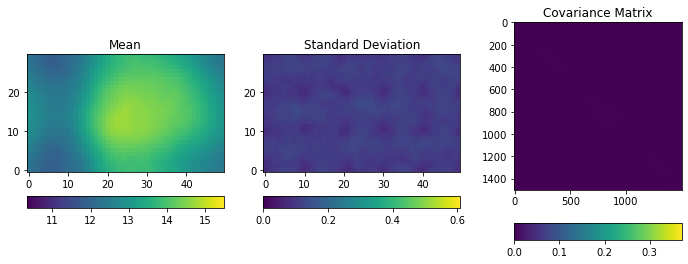

4


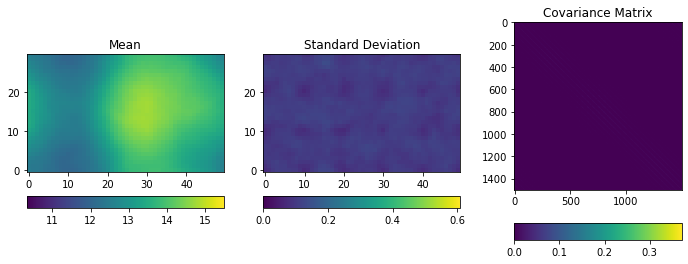

5


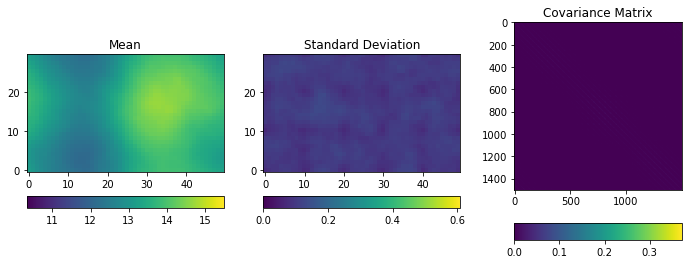

6


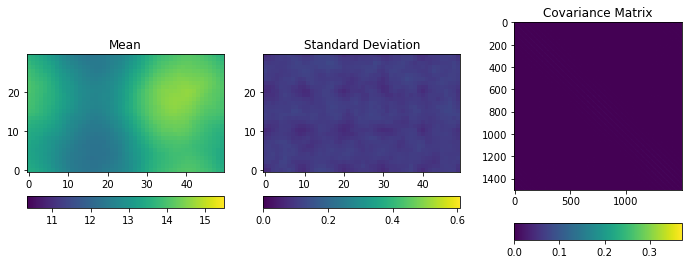

7


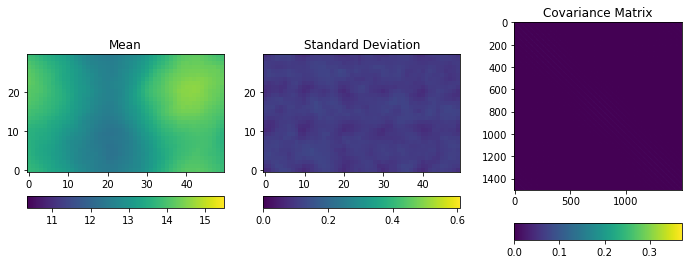

8


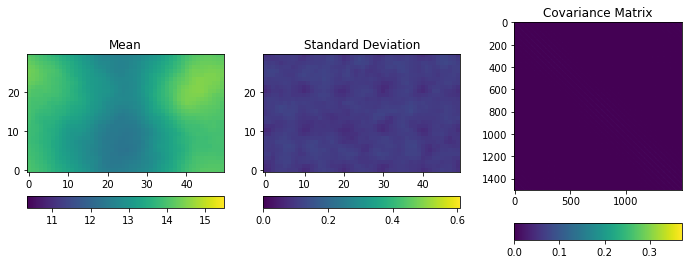

9


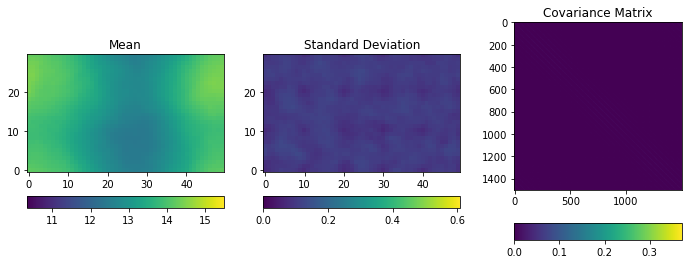

In [ ]:
etkFilter = ETKalmanFilter.ETKalman(statistics_etkf, observation)

for t in range(observation.N_obs):
    print(t)
    statistics_etkf.propagate(25)
    etkFilter.filter(statistics_etkf.ensemble.ensemble, observation.obses[t])
    statistics_etkf.plot()

## LETKF filtering

Updating/conditioning the distributions at every observation time

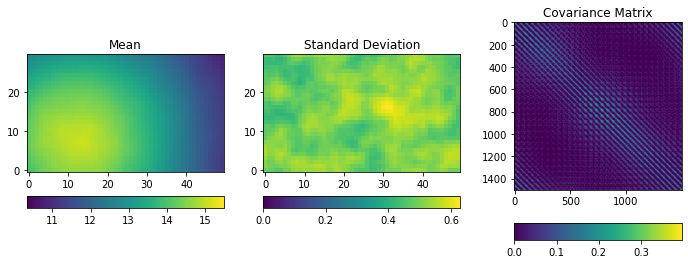

In [ ]:
statistics_letkf = Statistics.Statistics(simulator, 100)
statistics_letkf.set_prior(prior_args)

statistics_letkf.plot()

In [ ]:
# We choose the scale_r as about 2/3 of the correlation length in grid cells 
scale_r = 8

In [ ]:
sletkFilter = SLETKalmanFilter.SLETKalman(statistics_letkf, observation, scale_r)

In [ ]:
sletkFilter.groups

[[0, 2, 6, 8, 14], [1, 4, 5, 7, 13], [11, 3, 9], [10, 12]]

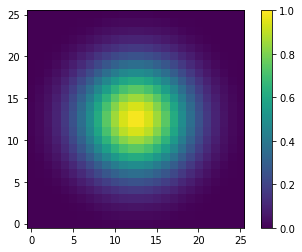

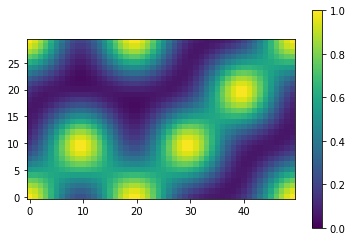

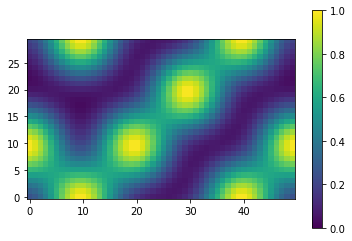

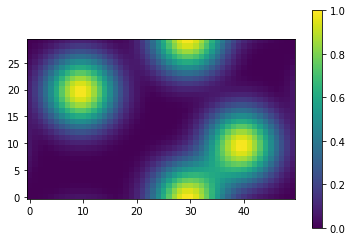

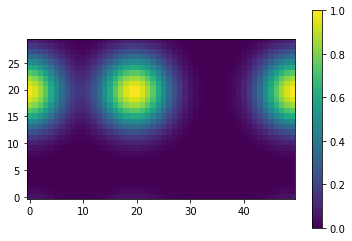

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(sletkFilter.W_loc, origin="lower", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()
for g in range(len(sletkFilter.groups)):
    plt.imshow(sletkFilter.W_analyses[g], origin="lower", vmin=0.0, vmax=1.0)
    plt.colorbar()
    plt.show()

0


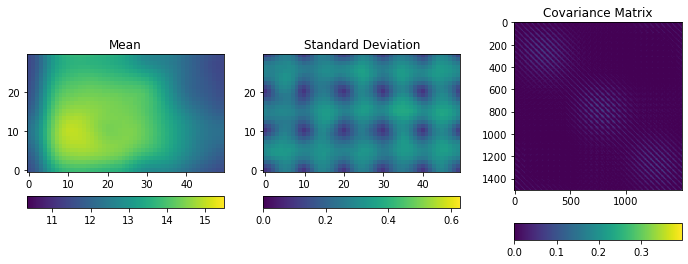

1


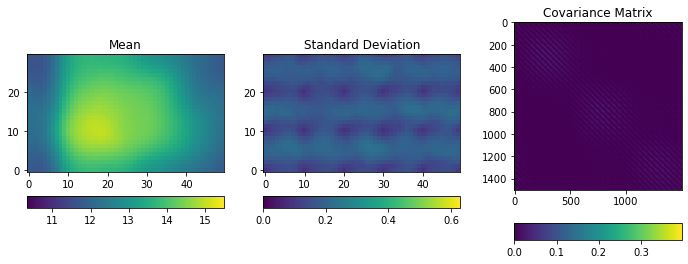

2


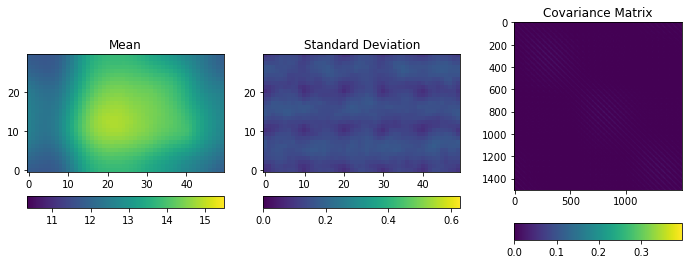

3


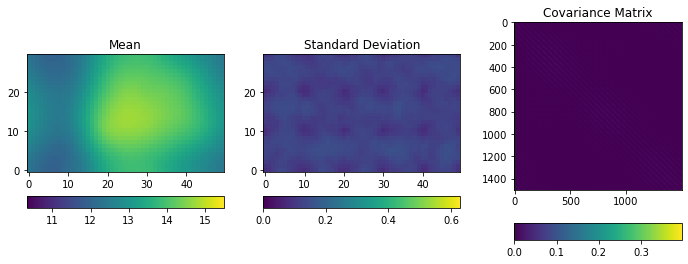

4


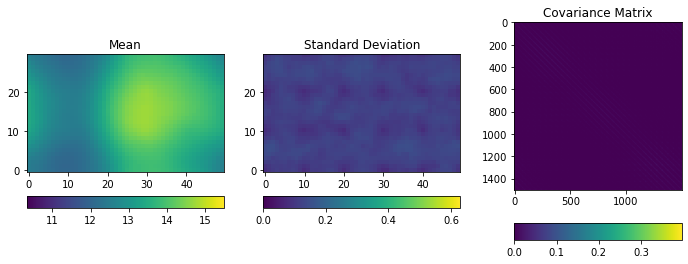

5


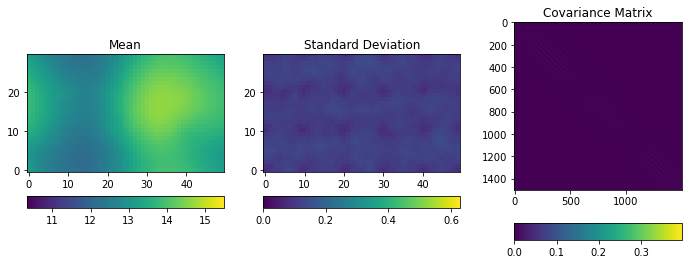

6


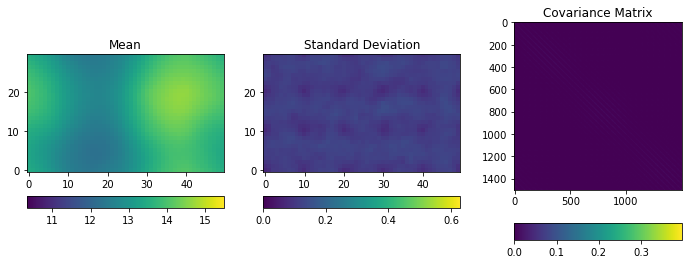

7


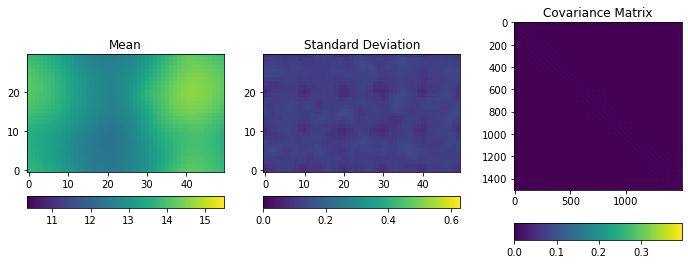

8


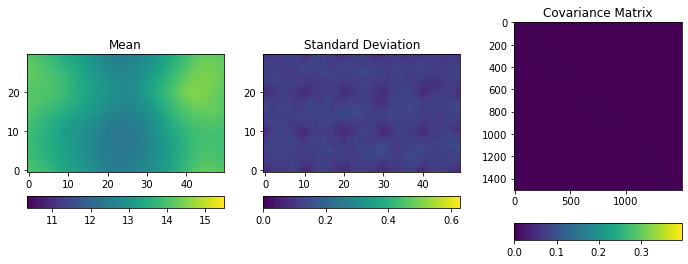

9


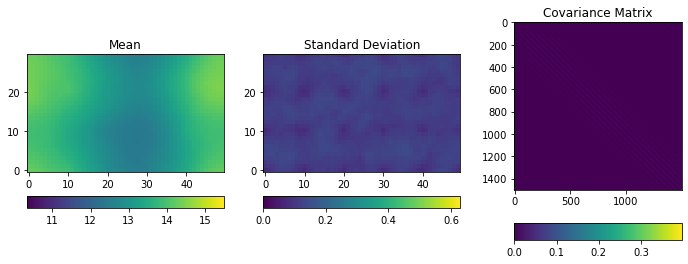

In [ ]:
for t in range(observation.N_obs):
    print(t)
    statistics_letkf.propagate(25)
    sletkFilter.filter(statistics_letkf.ensemble.ensemble, observation.obses[t])
    statistics_letkf.plot()

## Comparison

In [ ]:
import scipy.stats

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import numpy as np


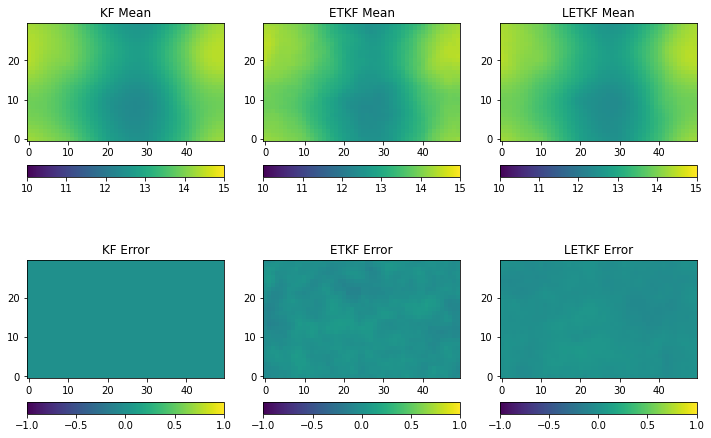

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

fig00 = axs[0,0].imshow(np.reshape(statistics_kf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=10, vmax=15)
axs[0,0].set_title("KF Mean")
ax_divider = make_axes_locatable(axs[0,0])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig00, cax=ax_cb, orientation="horizontal")

fig01 = axs[0,1].imshow(np.reshape(statistics_etkf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=10, vmax=15)
axs[0,1].set_title("ETKF Mean")
ax_divider = make_axes_locatable(axs[0,1])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig01, cax=ax_cb, orientation="horizontal")

fig02 = axs[0,2].imshow(np.reshape(statistics_letkf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=10, vmax=15)
axs[0,2].set_title("LETKF Mean")
ax_divider = make_axes_locatable(axs[0,2])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig02, cax=ax_cb, orientation="horizontal")

fig10 = axs[1,0].imshow(np.reshape(statistics_kf.mean, (grid.ny, grid.nx))-np.reshape(statistics_kf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=-1, vmax=1)
axs[1,0].set_title("KF Error")
ax_divider = make_axes_locatable(axs[1,0])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig10, cax=ax_cb, orientation="horizontal")

fig11 = axs[1,1].imshow(np.reshape(statistics_etkf.mean, (grid.ny, grid.nx))-np.reshape(statistics_kf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=-1, vmax=1)
axs[1,1].set_title("ETKF Error")
ax_divider = make_axes_locatable(axs[1,1])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig11, cax=ax_cb, orientation="horizontal")

fig12 = axs[1,2].imshow(np.reshape(statistics_letkf.mean, (grid.ny, grid.nx))-np.reshape(statistics_kf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=-1, vmax=1)
axs[1,2].set_title("LETKF Error")
ax_divider = make_axes_locatable(axs[1,2])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig12, cax=ax_cb, orientation="horizontal")

plt.show()

In [ ]:
print("Frobenius error in Cov matrix (KF) = ", 0)

Error: Session cannot generate requests

In [ ]:
1+1

Error: Session cannot generate requests